In [3]:
# TASK 1
# Importing given url data which is data set of titanic ship
import pandas as pd

Data_titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

print (Data_titanic.info()) # printing the information of data set to get some insight of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB
None


In [4]:
# Creating a Pie Chart presenting the Male and Female proportion ...

import matplotlib.pyplot as plt # to plot pie chart called base library 

Data_f_m = Data_titanic.sex # extract the sex columns to plot the distribution

print (Data_f_m.value_counts()) # gettng total value of male and female whatever catergories or data points 
# provide the count how many times value occured in data set

Data_f_m.value_counts().plot(kind='pie',legend =True,table=True,figsize=(8,8)) # plot the chart using pandas data frame
# not used the matplot here...


male      843
female    466
Name: sex, dtype: int64


['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
       fare      age
0  211.3375  29.0000
1  151.5500   0.9167
2  151.5500   2.0000
3  151.5500  30.0000
4  151.5500  25.0000


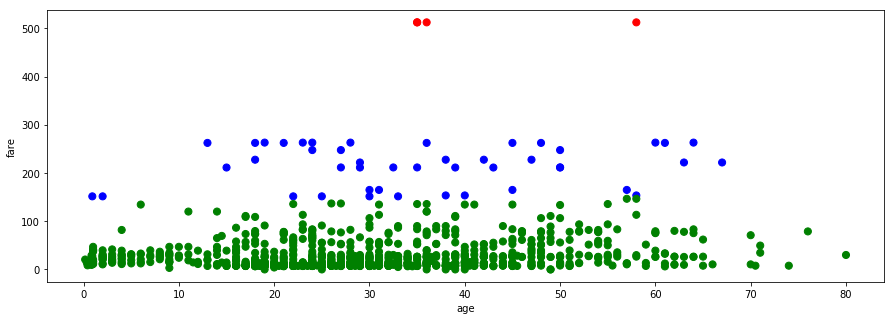

In [5]:
# Create a scatterplot with the fare paid and the Age, differ the plot color by gender
print (list(Data_titanic)) # another methods to get columns of data frame
import numpy as np # for array caluation or creating row and column data set numpy will is used
Data_fair_age = Data_titanic[['fare','age']] # selecting column suggest in question
Data_titanic.age.fillna(method='ffill') # filling nan value with forward fill

print (Data_fair_age.head()) # print top five record of extracted data points
Data_fair_age.fillna(method='backfill') # filling nan value with backfill fill

col = [] # used for coloring according to fare , color code present in this list
for j in Data_fair_age.fare:
    if j <150:
        col.append('g') # low fare
    elif j < 300:
        col.append('b') # average fare
    else:
        col.append('r') # high fare

        
Data_fair_age.plot(kind='scatter', x='age', y='fare',c=col,s=50,marker="o",legend=True,figsize=(15,5)) # plot the graph

In [6]:

### TASK 2
# GIVEN Data Set 
import numpy as np
Data_given_df = pd.DataFrame({"From_To":["LoNDon_paris","MAdrid_MiLAN","londON_StockhOlm","Budapest_PaRis","Brussels_londOn"],
                       "FlightNumber":[10045,np.nan,10065,np.nan,10085],
                       "RecentDelays":[[23,47],[],[24,43,87],[13],[67,32]],
                       "Airline":['KLM(!)',"<Air France>(12)","(British Airways.)","12.Air France","SwissAir"]})

print (Data_given_df)

            From_To  FlightNumber  RecentDelays             Airline
0      LoNDon_paris       10045.0      [23, 47]              KLM(!)
1      MAdrid_MiLAN           NaN            []    <Air France>(12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways.)
3    Budapest_PaRis           NaN          [13]       12.Air France
4   Brussels_londOn       10085.0      [67, 32]            SwissAir


In [108]:
# Task 2 :- Question :- 1. Some Value in FlightNumber column are missing. These numbers are meant to increase by 10 with each 
#so 10055 and 10075 need to be put in place. Fill in thesse missing number and make the column as intger column instead of float

Data_given_df.FlightNumber = Data_given_df.FlightNumber.interpolate() # filled the value suing pandas interpolate function
Data_given_df.FlightNumber = Data_given_df.FlightNumber.astype(int)  # ensuring for interger type and astype int make this.
print (Data_given_df)
print ("~~*~~"*10)
print (Data_given_df.info())
print ("~~*~~"*10)
print (Data_given_df.describe())

            From_To  FlightNumber  RecentDelays             Airline
0      LoNDon_paris         10045      [23, 47]              KLM(!)
1      MAdrid_MiLAN         10055            []    <Air France>(12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways.)
3    Budapest_PaRis         10075          [13]       12.Air France
4   Brussels_londOn         10085      [67, 32]            SwissAir
~~*~~~~*~~~~*~~~~*~~~~*~~~~*~~~~*~~~~*~~~~*~~~~*~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
From_To         5 non-null object
FlightNumber    5 non-null int32
RecentDelays    5 non-null object
Airline         5 non-null object
dtypes: int32(1), object(3)
memory usage: 220.0+ bytes
None
~~*~~~~*~~~~*~~~~*~~~~*~~~~*~~~~*~~~~*~~~~*~~~~*~~
       FlightNumber
count      5.000000
mean   10065.000000
std       15.811388
min    10045.000000
25%    10055.000000
50%    10065.000000
75%    10075.000000
max    10085.000000


In [7]:
# Task 2 :-  Question 2 :- The From_To Column would be better as two separete columns
# Split each string on the underscore delimiter '_' to give a new temporary Data Frame with the Correct values. 
# Assign the correct column name to this temproray Data Frame

Data_given_df.From_To.str.replace("_"," ") # Temporaray done 
# Data_given_df = Data_given_df.From_To.str.replace("_"," ") # To fix permament  uncomment this


0        LoNDon paris
1        MAdrid MiLAN
2    londON StockhOlm
3      Budapest PaRis
4     Brussels londOn
Name: From_To, dtype: object

In [8]:

# Task 2 :- Question 3 :- Notice how the capitalisation of the city is all mixed up in this temporary Data frame.
# Standardise the strings so that only the First Letter is Upper Case (e.g. "lonDON" Should become "London")

Store_from_to = Data_given_df.From_To.str.capitalize()
print (Store_from_to)

0        London_paris
1        Madrid_milan
2    London_stockholm
3      Budapest_paris
4     Brussels_london
Name: From_To, dtype: object


In [9]:
# Task 2 :- Question 4 :- Delete the From_To column from df and attached the temporary DataFrame from the previous Question
del Data_given_df["From_To"] # delet this from orignal data frame

Data_given_df["Store_from_to"] = Store_from_to # add this back to df
print (Data_given_df)


   FlightNumber  RecentDelays             Airline     Store_from_to
0       10045.0      [23, 47]              KLM(!)      London_paris
1           NaN            []    <Air France>(12)      Madrid_milan
2       10065.0  [24, 43, 87]  (British Airways.)  London_stockholm
3           NaN          [13]       12.Air France    Budapest_paris
4       10085.0      [67, 32]            SwissAir   Brussels_london


In [10]:

# Task 2 :- Question 5 :- In the RecentDelays Column, the values have been entered into the Dataframe as a list. 
# We would like each first value in its own column, each second value in its own columm and so on. 
# if there isn't an Nth Value should be NaN
# Expand the Series of lists into a Dataframe names delays, rename the columns delay_1, delay_2 etc
# And Replace the unwanted RecentDelays clumn in df with delays

In [11]:
list_l = Data_given_df.RecentDelays.str.len() # getting length of each item of delays
value  = [x for x in Data_given_df.RecentDelays] # getting value of delays


Max_len = max(list_l) # Max of list or delays
Name_Col = [str("Delay_")+str(x+1) for x in range(Max_len)] # Creating the name as per delay also used column named in next step
Name_Col

['Delay_1', 'Delay_2', 'Delay_3']

In [12]:
New_Data_Delay = np.array([x+['NaN']*(Max_len-len(x)) for x in value]) # creating ndarray and filling nan with values which
# will be used in next step
    
New_Data_Delay 

array([['23', '47', 'NaN'],
       ['NaN', 'NaN', 'NaN'],
       ['24', '43', '87'],
       ['13', 'NaN', 'NaN'],
       ['67', '32', 'NaN']], dtype='<U11')

In [13]:
Delay_df = pd.DataFrame(columns=Name_Col,data=New_Data_Delay) # creating delayed data frame using colum which 
# created in previous steps and also passed data which is ndarray


In [14]:
df_row_merged = pd.concat([Data_given_df,Delay_df], axis=1) # concating two df delays and orignial one reason both same have 
# length of data and also sequentially same
df_row_merged  # finall output

,FlightNumber,RecentDelays,Airline,Store_from_to,Delay_1,Delay_2,Delay_3
0,10045.0,"[23, 47]",KLM(!),London_paris,23,47,NaN
1,NaN,[],<Air France>(12),Madrid_milan,NaN,NaN,NaN
2,10065.0,"[24, 43, 87]",(British Airways.),London_stockholm,24,43,87
3,NaN,[13],12.Air France,Budapest_paris,13,NaN,NaN
4,10085.0,"[67, 32]",SwissAir,Brussels_london,67,32,NaN


In [17]:
# Using Pandas Function 
Delay_data =Data_given_df.assign(**pd.DataFrame(Data_given_df['RecentDelays'].tolist()).add_prefix('Recent_Delay_s'))
Delay_data

,FlightNumber,RecentDelays,Airline,Store_from_to,Recent_Delay_s0,Recent_Delay_s1,Recent_Delay_s2
0,10045.0,"[23, 47]",KLM(!),London_paris,23.0,47.0,NaN
1,NaN,[],<Air France>(12),Madrid_milan,NaN,NaN,NaN
2,10065.0,"[24, 43, 87]",(British Airways.),London_stockholm,24.0,43.0,87.0
3,NaN,[13],12.Air France,Budapest_paris,13.0,NaN,NaN
4,10085.0,"[67, 32]",SwissAir,Brussels_london,67.0,32.0,NaN
